## Datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## PS2 - What day of the week was 1/1/1970

In [1]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [2]:
import numpy as np
import pandas as pd

myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
print(mySeries.index.dayofweek)
print(f'{mySeries.index.dayofweek[0]} --> {days_of_week[mySeries.index.dayofweek[0]]}')

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64')
3 --> Thursday


So 01.01.1970 was a Thursday

## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


### What day of the week has the most sightings.

Let's calculate ammount of sightings for every week of the day, and build dataframe with this info.

In [4]:
sightings_per_weekday = []
for weekday in days_of_week:
    sightings_per_weekday.append(ufo[ufo.Time.dt.day_name() == weekday].shape[0])

spd = pd.DataFrame({'Day of the Week': days_of_week, 'Sightings Reported': sightings_per_weekday})
spd

,Day of the Week,Sightings Reported
0,Monday,2300
1,Tuesday,2822
2,Wednesday,2476
3,Thursday,2598
4,Friday,2669
5,Saturday,2687
6,Sunday,2689


Let's sort this table by Sightings Reported:

In [5]:
spd_sorted = spd.sort_values(by = ['Sightings Reported'], ascending = False)
spd_sorted

,Day of the Week,Sightings Reported
1,Tuesday,2822
6,Sunday,2689
5,Saturday,2687
4,Friday,2669
3,Thursday,2598
2,Wednesday,2476
0,Monday,2300


In [6]:
spd_sorted.iloc[0]

Day of the Week       Tuesday
Sightings Reported       2822
Name: 1, dtype: object

As we see, it is **Tuesday**

### On the day with most sightings plot a histogram the time of day the sightings occured

Let's get all sightings on Tuesday:

In [24]:
ufo_t = ufo[ufo.Time.dt.day_name() == 'Tuesday']
ufo_t

,City,Colors Reported,Shape Reported,State,Time
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00
20,Nebraska,NaN,DISK,NE,1943-06-01 15:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
41,New York City,NaN,DISK,NY,1946-01-08 02:00:00
...,...,...,...,...,...
18195,Walpole,GREEN,FIREBALL,NH,2000-12-26 18:20:00
18196,Brocton,GREEN,OVAL,MA,2000-12-26 18:23:00
18197,Greenfiled,GREEN,FIREBALL,MA,2000-12-26 18:30:00
18198,Warren,NaN,FIREBALL,VT,2000-12-26 18:30:00


<AxesSubplot:xlabel='Time'>

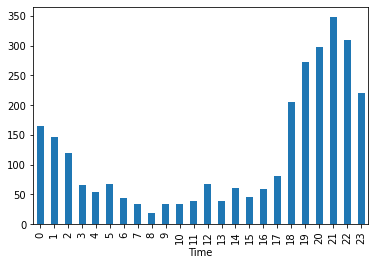

In [39]:
ufo_t.Time.groupby(ufo_t.Time.dt.hour).count().plot(kind = "bar")

As we see, most sightings on Tuesday occured at night (between 18:00-01:00)

### Do the same for the day with the 2nd most sightings

Let's get all sightings on Sunday:

In [40]:
ufo_s = ufo[ufo.Time.dt.day_name() == 'Sunday']
ufo_s

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
10,Fontana,NaN,LIGHT,CA,1937-08-15 21:00:00
14,Ludington,NaN,DISK,MI,1941-06-01 13:00:00
21,NaN,NaN,NaN,LA,1943-08-15 00:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


<AxesSubplot:xlabel='Time'>

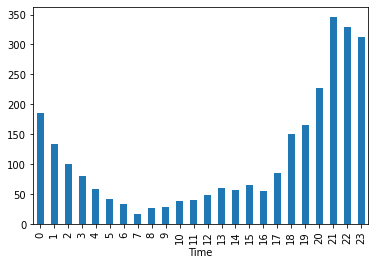

In [43]:
ufo_s.Time.groupby(ufo_s.Time.dt.hour).count().plot(kind = "bar")

On sundays we get excelling peak in between 21:00-00:00